In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
# Loading the dataset
data = sm.datasets.fair.load_pandas().data
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
# add "affair" column: 1 represents having affairs, 0 represents not 
data['affair'] = (data.affairs > 0).astype(int)
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [5]:
data = data.drop(columns=['affairs'])
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,6366.0,4.109645,0.961430,1.0,4.0,4.0,5.0,5.0
age,6366.0,29.082862,6.847882,17.5,22.0,27.0,32.0,42.0
yrs_married,6366.0,9.009425,7.280120,0.5,2.5,6.0,16.5,23.0
children,6366.0,1.396874,1.433471,0.0,0.0,1.0,2.0,5.5
religious,6366.0,2.426170,0.878369,1.0,2.0,2.0,3.0,4.0
educ,6366.0,14.209865,2.178003,9.0,12.0,14.0,16.0,20.0
occupation,6366.0,3.424128,0.942399,1.0,3.0,3.0,4.0,6.0
occupation_husb,6366.0,3.850141,1.346435,1.0,3.0,4.0,5.0,6.0
affair,6366.0,0.322495,0.467468,0.0,0.0,0.0,1.0,1.0


## Data Preprocessing


1. handling missing values
2. handling categorical data - No categorical data is present.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 422.9 KB


## No need for encoding since each independent variable is float/int(non-categorical)

In [10]:
# handling missing values
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affair             0
dtype: int64

## No Null values are present

#  Exploratory Data Analysis

In [11]:
data["affair"].value_counts()

affair
0    4313
1    2053
Name: count, dtype: int64

[Text(0.5, 1.0, 'affair or not')]

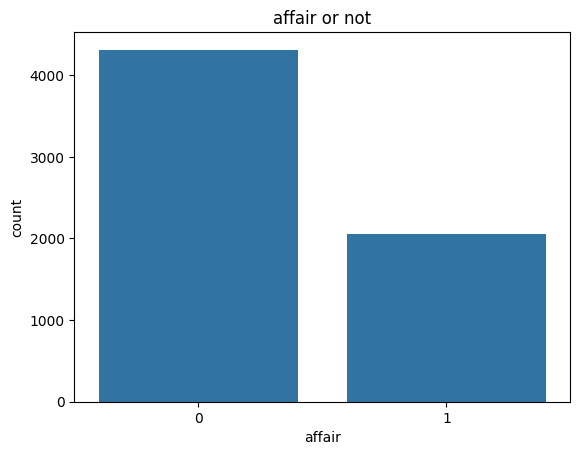

In [12]:
sns.countplot(x=data["affair"]).set(title = 'affair or not')

<Axes: >

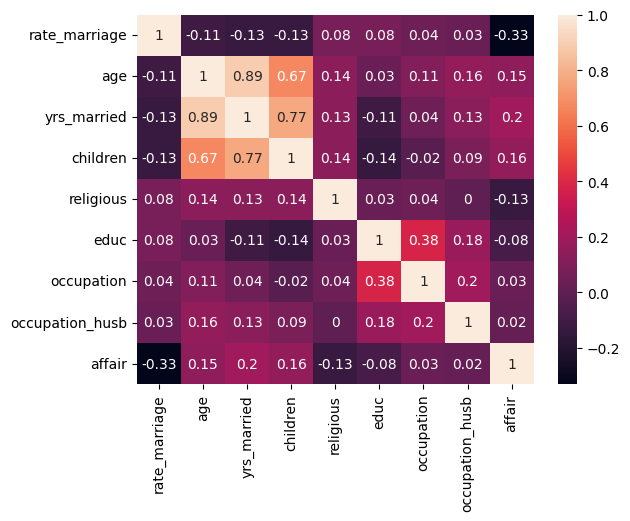

In [13]:
corr_mat = data.corr().round(2)
sns.heatmap(data = corr_mat,annot= True)

### Affair is dependent on Rate_marriage the most but we can concude no other column is highly corelated with the target column

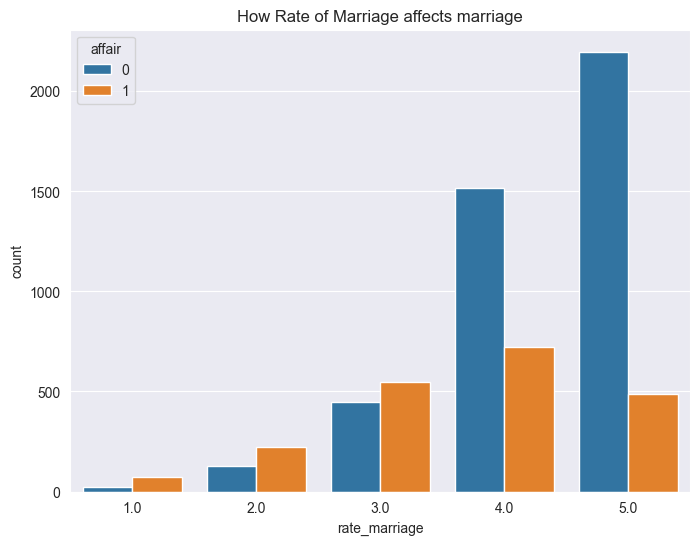

In [14]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(data=data, x="rate_marriage", hue="affair")
plt.title("How Rate of Marriage affects marriage")
plt.show()

### If rate of marriage is high chances of not having affair are very much higher as compared to other and this ratio changes as the rate of marriage changes

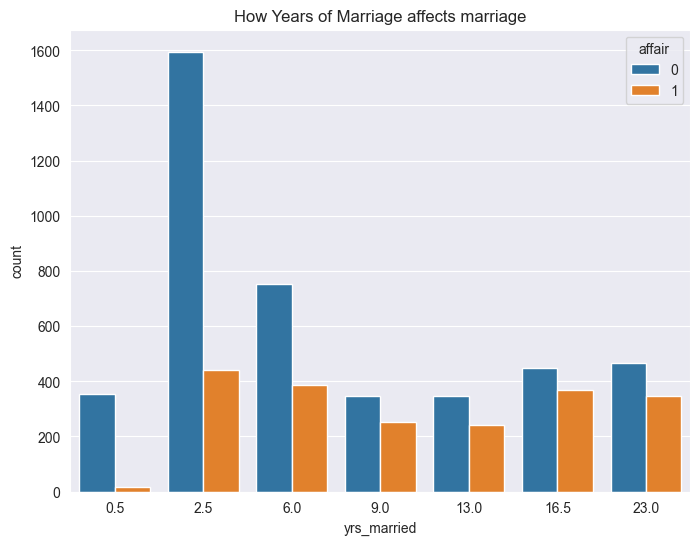

In [15]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(data=data, x="yrs_married", hue="affair")
plt.title("How Years of Marriage affects marriage")
plt.show()

In [16]:
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0


## Splitting the data

In [17]:
X = data.drop(columns=['affair'])
Y = data.affair

In [18]:
print(X.shape, Y.shape)

(6366, 8) (6366,)


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [20]:
print(f'Shape of train feature:{x_train.shape}')
print(f'Shape of test feature :{x_test.shape}')
print(f'Shape of train target :{y_train.shape}')
print(f'Shape of test target  :{y_test.shape}')

Shape of train feature:(4456, 8)
Shape of test feature :(1910, 8)
Shape of train target :(4456,)
Shape of test target  :(1910,)


## Training the model

In [21]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [22]:
print("Model Score on Train data is:", classifier.score(x_train, y_train))
print("Model Score on Test data is:", classifier.score(x_test, y_test))


Model Score on Train data is: 0.7235188509874326
Model Score on Test data is: 0.7319371727748691


## No overfitting or underfitting is observed, lets confirm

In [23]:
y_pred = classifier.predict(x_test)

In [24]:
Y.mean()

0.3224945020420987

#### Only 32% of the women had affairs, which means that we could obtain 68% accuracy by always predicting "no". 
#### So we're doing better than the null error rate, but not by much.

In [25]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy Score is:", accuracy_score(y_test, y_pred))

[[1172  131]
 [ 381  226]]
Accuracy Score is: 0.7319371727748691


## Confusion matrix suggest the model is not underfit and giving good prediction for both classes

## Now let's try feature scaling and see if it improves the accuracy.

In [26]:

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

classifier2 = LogisticRegression()
classifier2.fit(x_train_scaled, y_train)

y_pred2 = classifier2.predict(x_test_scaled)

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print("accuracy score is:",accuracy_score(y_test, y_pred2))

[[1172  131]
 [ 381  226]]
accuracy score is: 0.7319371727748691
